# Compile mseed days: Example usage

This notebook provides an example of how you can use the compile_mseed_day.py module to convert a day of miniseed files into an xarray with a spectrogram for every 5-minute file.

In [31]:
import compile_mseed_day as md
import time
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Get an xarray of spectrograms

All you need to do is select an instrument, and specify the year, month, and day. By default the data is broken down into half-hour segments, so there should be 48 total segments in a day, assuming all files are present. 

Mostly as a sanity check, this function will print out which segment you're on, so you can watch progress. 


In [2]:
# Set instrument and date
instrument = "RS03AXBS-LJ03A-09-HYDBBA302"
year = 2024
month = 1
day = 1

# timing
start_time = time.time()

# function
spec_xa = md.mseed_to_xarray(instrument, year, month, day)

# timing
end_time = time.time()
elapsed = end_time - start_time
elapsed

Segment 1 of 48
Segment 2 of 48
Segment 3 of 48
Segment 4 of 48
Segment 5 of 48
Segment 6 of 48
Segment 7 of 48
Segment 8 of 48
Segment 9 of 48
Segment 10 of 48
Segment 11 of 48
Segment 12 of 48
Segment 13 of 48
Segment 14 of 48
Segment 15 of 48
Segment 16 of 48
Segment 17 of 48
Segment 18 of 48
Segment 19 of 48
Segment 20 of 48
Segment 21 of 48
Segment 22 of 48
Segment 23 of 48
Segment 46 of 48
Segment 47 of 48
Segment 48 of 48


218.3156032562256

## A quick look at the output

The output xarray is shown below - we've got 288 spectrograms stacked up (that's one every 5 minutes). Each spectrogram is 705 pixels wide and 101 pixels tall. 

In [3]:
spec_xa

<xarray.DataArray (time: 288, frequency: 101, seconds: 705)> Size: 164MB
dask.array<getitem, shape=(288, 101, 705), dtype=float64, chunksize=(1, 50, 50), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 808B 0.0 2.0 4.0 6.0 ... 196.0 198.0 200.0
  * seconds    (seconds) float64 6kB 0.25 0.675 1.1 1.525 ... 298.6 299.0 299.4
  * time       (time) datetime64[ns] 2kB 2024-01-01 ... 2024-01-01T23:55:00

# Quick plotting

If you plot this spectrogram pretty much right out of the box (ok a couple of tweaks) you get this. You can see some energy around 20-25 Hz. There are some distinct calls and then what's probably fin whale calls making up some of the elevated background in that frequency band as well. 

There are also a lot of broadband "spikes" that are probably instrument/electrical noise or possibly even an artifact of the way that the data segments were stitched back together (by me). 

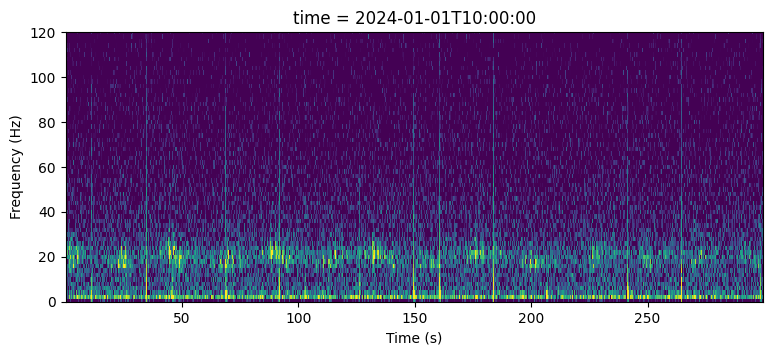

In [4]:
sample = spec_xa.isel(time=120)

fig, ax = plt.subplots(1,1,figsize=(9,3.5))
sample.plot(ax=ax, vmin=3, vmax=5.5, add_colorbar=False)#, add_colorbar=False)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_ylim([0,120]);